In [1]:
ls

follow_line_conf.yml  image.png       MyAlgorithm.pyc  resources_rc.pyc
follow_line.py        interfaces/     README.md        Untitled.ipynb
generateGUI           mask.png        resources/
gui/                  MyAlgorithm.py  resources_rc.py


In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import glob

In [138]:
img = cv2.imread('images/1.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [139]:
def show_img(img):
    plt.imshow(img)
    plt.show()

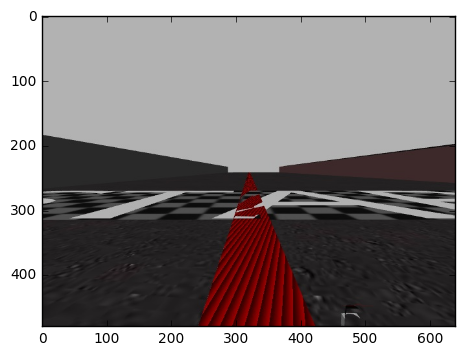

In [140]:
show_img(img)

In [126]:
height, width, channels = img.shape
print(img.shape)

(480, 640, 3)


In [135]:
print(img.dtype, np.max(img))
print img[305, 320 ,:]
print(np.argmax(img[:, 320,1]))

(dtype('uint8'), 213)
[175 181 181]
305


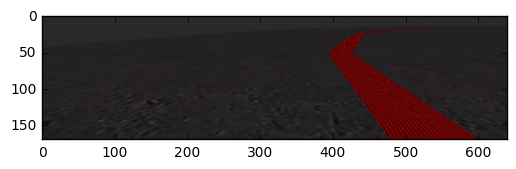

In [117]:
crop = img[230:400, :, :] 

show_img(crop)

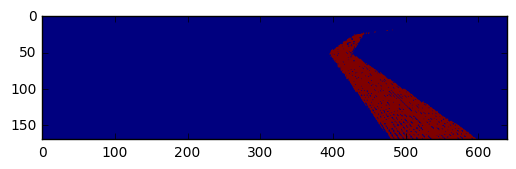

In [118]:
lower = np.array([79,0,0], dtype='uint8')
upper = np.array([191,40,40], dtype='uint8')

mask = cv2.inRange(crop, lower, upper)

show_img(mask)

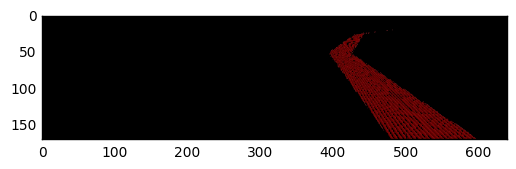

In [119]:
extraction = cv2.bitwise_and(crop, crop, mask = mask)

show_img(extraction)

In [120]:
m = cv2.moments(mask, False)

print(m)

{'mu02': 2979260411.9594154, 'mu03': -53911223863.081055, 'm11': 126153439350.0, 'nu02': 0.0006126278600675552, 'm12': 16378940415930.0, 'mu21': -6794593552.265625, 'mu20': 4496497845.719849, 'nu20': 0.0009246186879011395, 'm30': 252429999094125.0, 'nu21': -9.408574523281072e-07, 'mu11': 3040760104.601654, 'mu12': -40267515067.98657, 'nu11': 0.0006252740943299196, 'nu12': -5.575902568273067e-06, 'm02': 32647941465.0, 'm03': 4424058944055.0, 'm00': 2205240.0, 'm01': 255786165.0, 'mu30': 51779605045.1875, 'nu30': 7.169998751305174e-06, 'nu03': -7.465167172331512e-06, 'm10': 1061406135.0, 'm20': 515362881285.0, 'm21': 62697336406890.0}


(481.3109389454209, 115.99017113783533)


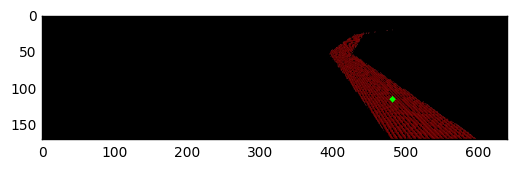

In [121]:
try:
  x, y = m['m10']/m['m00'], m['m01']/m['m00']
except ZeroDivisionError:
  x, y = height//2, width//2
print(x,y)
extraction = cv2.circle(extraction,(int(x), int(y)), 2,(0,255,0),3)
show_img(extraction)

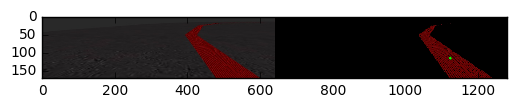

In [122]:
img_window = np.hstack([crop, extraction])

show_img(img_window)

In [110]:
def get_line_center(file_name):
    
    img = cv2.imread(file_name)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    height, width, channels = img.shape
    crop = img[230:400, :, :] 
    lower = np.array([79,0,0], dtype='uint8')
    upper = np.array([191,40,40], dtype='uint8')
    mask = cv2.inRange(crop, lower, upper)
    extraction = cv2.bitwise_and(crop, crop, mask = mask)
    m = cv2.moments(mask, False)
    try:
      x, y = m['m10']/m['m00'], m['m01']/m['m00']
    except ZeroDivisionError:
      x, y = width//2, height//2
    
    return x

In [111]:
def pid(x, speed, int_cte, prev_cte, kp=1.2, kd=0.001, ki=.5):
    
    v_max = 1
    cte = width//2 - x
    diff_cte = (cte - prev_cte)/speed
    #prev_cte = cte
    int_cte += cte
    steer = -kp*cte - kd*diff_cte - ki*int_cte
    if steer == 0:
        speed = v_max
    else:
        speed = v_max/steer    
    print (cte, speed, steer)    
    return speed, int_cte, cte

In [112]:
images_list = sorted(glob.glob('images/*'))

prev_cte = 0
int_cte = 0
speed = 1
v_max = 1

for image_name in images_list:
    x = get_line_center(image_name)
    print x
    speed, int_cte, prev_cte = pid(x, speed, int_cte, prev_cte)
    

324.649499925
(-4.649499925362022, 0.12644144235201618, 7.908799373040799)
324.688005997
(-4.688005997001483, 0.09713769507675497, 10.29466469437877)
306.316853933
(13.683146067415748, -0.05324325935747981, -18.78172020397764)
327.463933502
(-7.463933502395037, 0.09882703819082661, 10.118688349934002)
327.409238135
(-7.409238135473856, 0.07064991817371089, 14.154298063604891)
327.4395218
(-7.439521800281284, 0.05583042283706671, 17.91138145090465)
327.415553028
(-7.415553028148963, 0.046318731973736545, 21.589537480581633)
327.505394662
(-7.50539466212382, 0.03928900460217859, 25.452413725557957)
327.425821065
(-7.425821064552679, 0.034404611557366745, 29.065870961297897)
327.473408027
(-7.473408027230164, 0.03042927692221972, 32.8630878267696)
327.577774624
(-7.577774623900098, 0.02718923528076257, 36.77926170683949)
327.695238095
(-7.695238095238096, 0.02452860477778705, 40.76872733118493)
327.621851118
(-7.621851118030008, 0.022479853126420216, 44.48427640413343)
325.585041762
(-5.5

325.404294653
(-5.4042946530148015, 0.0010240909771657436, 976.4757451213785)
334.114114969
(-14.11411496869664, 0.000989295282165815, 1010.8205487554228)
333.89710474
(-13.897104740278166, 0.000991292091598806, 1008.7844021706554)
333.948044614
(-13.94804461386417, 0.0009841644998436776, 1016.0902980739883)
333.946907653
(-13.946907653205301, 0.0009775076994059022, 1023.0098449431835)
333.910909349
(-13.910909348843802, 0.0009709808485592281, 1029.8864302873033)
333.977121875
(-13.977121875441298, 0.0009642648608526721, 1037.0594642593617)
333.969327791
(-13.9693277913143, 0.0009578924824090182, 1043.9585009426996)
334.015911351
(-14.015911351044167, 0.0009514032078792366, 1051.0790711217908)
334.035729598
(-14.035729598399314, 0.0009450965826129062, 1058.0929170596537)
334.275445658
(-14.27544565842436, 0.0009383053793381348, 1065.7511104810926)
325.42369967
(-5.423699670439873, 0.0009540587645318987, 1048.1534651491222)
334.178298955
(-14.178298954506943, 0.0009222046121808836, 1084

338.949197121
(-18.94919712070873, 0.0005541298010606043, 1804.631330215412)
339.408090748
(-19.408090747574136, 0.0005507517552132626, 1815.7000691042356)
339.068773234
(-19.068773234200762, 0.0005484311178369492, 1823.3830420565303)
339.47792314
(-19.47792313982012, 0.000544966517233666, 1834.9751193452291)
339.370071194
(-19.37007119386635, 0.0005424208968302724, 1843.5867899700543)
339.686816894
(-19.68681689380651, 0.0005392021105951174, 1854.5921470824735)
325.56615254
(-5.566152539974553, 0.0005513717453071212, 1813.6584047174688)
339.774748153
(-19.774748153122914, 0.0005283865905830714, 1892.5537056050307)
339.668441168
(-19.668441168441177, 0.0005329667581498931, 1876.289627276824)
339.880536913
(-19.880536912751666, 0.0005299182419164004, 1887.083555349203)
339.857373086
(-19.857373086220775, 0.000527275213852784, 1896.5427801793114)
339.888045541
(-19.888045540796952, 0.0005244868503857053, 1906.6254935936036)
340.149277689
(-20.149277688603547, 0.0005215250300070532, 1917.

In [ ]:
>>> green = np.uint8([[[0,255,0 ]]])
>>> hsv_green = cv2.cvtColor(green,cv2.COLOR_BGR2HSV)
>>> print hsv_green
[[[ 60 255 255]]]

In [136]:
red = np.uint8([[[0,0,255]]])
hsv_red = cv2.cvtColor(red, cv2.COLOR_BGR2HSV)
print hsv_red

[[[  0 255 255]]]


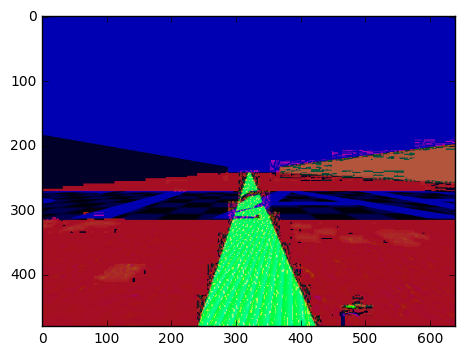

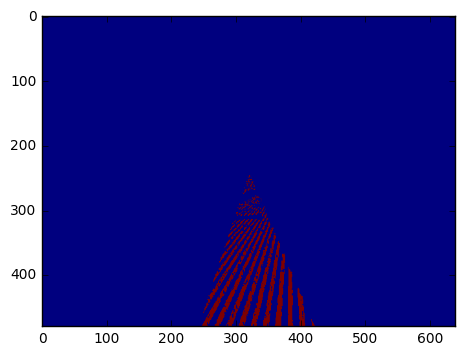

In [144]:
img_hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

show_img(img_hsv)

lower = np.array([0,100,100], dtype='uint8')
upper = np.array([10,255,250], dtype='uint8')

mask = cv2.inRange(img_hsv, lower, upper)
show_img(mask)


255